### Exercise 8
Practice training a deep neural network on the CIFAR10 image dataset:

1. Build a DNN with 20 hidden layers of 100 neurons each (that’s too many, but it’s the point of this exercise). Use He initialization and the Swish activation function.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf


In [31]:
# Build the DNN
tf.keras.backend.clear_session()
tf.keras.utils.set_random_seed(42)
model = tf.keras.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=[32, 32, 3]))
for _ in range(20):
    model.add(tf.keras.layers.Dense(100, activation="swish", kernel_initializer="he_normal"))
model.add(tf.keras.layers.Dense(10, activation="softmax"))

In [32]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 3072)              0         
                                                                 
 dense (Dense)               (None, 100)               307300    
                                                                 
 dense_1 (Dense)             (None, 100)               10100     
                                                                 
 dense_2 (Dense)             (None, 100)               10100     
                                                                 
 dense_3 (Dense)             (None, 100)               10100     
                                                                 
 dense_4 (Dense)             (None, 100)               10100     
                                                                 
 dense_5 (Dense)             (None, 100)               1

2. Using Nadam optimization and early stopping, train the network on the CIFAR10 dataset. You can load it with tf.keras.datasets.cifar10.load_​data(). The dataset is composed of 60,000 32 × 32–pixel color images (50,000 for training, 10,000 for testing) with 10 classes, so you’ll need a softmax output layer with 10 neurons. Remember to search for the right learning rate each time you change the model_selu’s architecture or hyperparameters.

In [2]:
(X_train_full, y_train_full), (X_test, y_test) = tf.keras.datasets.cifar10.load_data()

In [3]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog',
               'frog', 'horse', 'ship', 'truck']

Text(0.5, 1.0, 'frog')

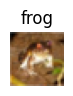

In [4]:
plt.figure(figsize=(0.7,0.7))
plt.imshow(X_train_full[0])
plt.grid(False)
plt.axis('off');
plt.title(class_names[y_train_full[0][0]])

In [5]:
# Scale the input features as early as possible!
X_train_full, X_test = X_train_full / 255., X_test / 255.

In [4]:
# Create a validation set
X_train, X_valid  = X_train_full[:40000], X_train_full[40000:]
y_train, y_valid = y_train_full[:40000], y_train_full[40000:]

In [33]:
optimizer = tf.keras.optimizers.legacy.Nadam()
model.compile(optimizer=optimizer, loss="sparse_categorical_crossentropy", metrics=["accuracy"])
early_stopping_cb = tf.keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)
learning_rate_cb = tf.keras.callbacks.ReduceLROnPlateau(patience=5, verbose=1)
history = model.fit(X_train, y_train, validation_data=(X_valid, y_valid), epochs=30, callbacks=[early_stopping_cb, learning_rate_cb], batch_size=64)

Epoch 1/30
625/625 [==============================] - 20s 26ms/step - loss: 2.1101 - accuracy: 0.1975 - val_loss: 1.9621 - val_accuracy: 0.2537 - lr: 0.0010
Epoch 2/30
625/625 [==============================] - 16s 26ms/step - loss: 1.8802 - accuracy: 0.2990 - val_loss: 1.9120 - val_accuracy: 0.2951 - lr: 0.0010
Epoch 3/30
625/625 [==============================] - 16s 26ms/step - loss: 1.7790 - accuracy: 0.3493 - val_loss: 1.7561 - val_accuracy: 0.3713 - lr: 0.0010
Epoch 4/30
625/625 [==============================] - 16s 26ms/step - loss: 1.7056 - accuracy: 0.3837 - val_loss: 1.7210 - val_accuracy: 0.3815 - lr: 0.0010
Epoch 5/30
625/625 [==============================] - 17s 27ms/step - loss: 1.6539 - accuracy: 0.4042 - val_loss: 1.6390 - val_accuracy: 0.4116 - lr: 0.0010
Epoch 6/30
625/625 [==============================] - 17s 26ms/step - loss: 1.6028 - accuracy: 0.4200 - val_loss: 1.6362 - val_accuracy: 0.4176 - lr: 0.0010
Epoch 7/30
625/625 [==============================] - 17s 

In [34]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy', 'lr'])

<Axes: xlabel='Epoch'>

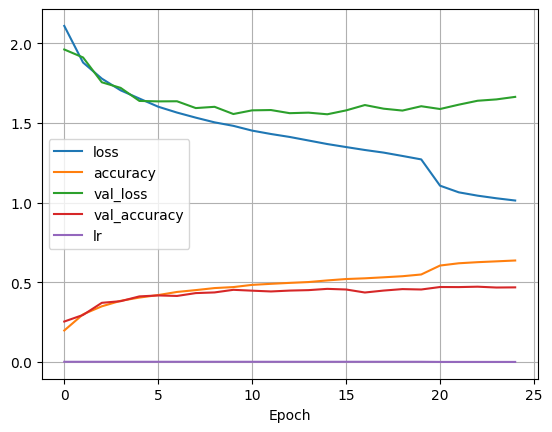

In [35]:
pd.DataFrame(history.history).plot(grid=True, xlabel="Epoch")

<Axes: xlabel='epoch', ylabel='lr'>

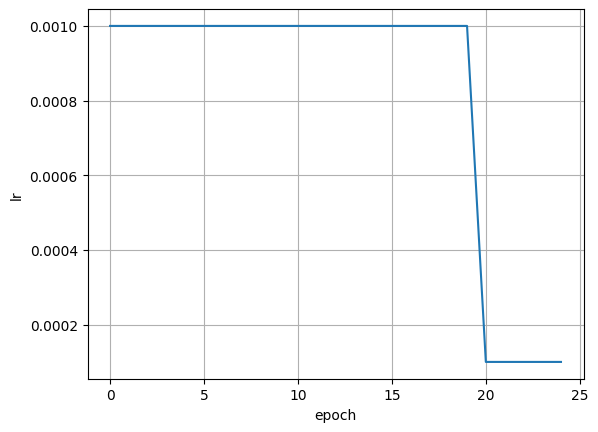

In [37]:
pd.Series(history.history['lr']).plot(grid=True, xlabel="epoch", ylabel="lr")

3. Now try adding batch normalization and compare the learning curves: is it converging faster than before? Does it produce a better model? How does it affect training speed?

In [38]:
model_bn = tf.keras.Sequential()
model_bn.add(tf.keras.layers.Flatten(input_shape=[32, 32, 3]))
model_bn.add(tf.keras.layers.BatchNormalization())
for _ in range(20):
    model_bn.add(tf.keras.layers.Dense(100, activation="swish", kernel_initializer="he_normal"))
    model_bn.add(tf.keras.layers.BatchNormalization())
model_bn.add(tf.keras.layers.Dense(10, activation="softmax"))
model_bn.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 3072)              0         
                                                                 
 batch_normalization (Batch  (None, 3072)              12288     
 Normalization)                                                  
                                                                 
 dense_21 (Dense)            (None, 100)               307300    
                                                                 
 batch_normalization_1 (Bat  (None, 100)               400       
 chNormalization)                                                
                                                                 
 dense_22 (Dense)            (None, 100)               10100     
                                                                 
 batch_normalization_2 (Bat  (None, 100)              

In [39]:
optimizer_bn = tf.keras.optimizers.legacy.Nadam()
model_bn.compile(optimizer=optimizer_bn, loss="sparse_categorical_crossentropy", metrics=["accuracy"])
early_stopping_cb_bn = tf.keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)
learning_rate_cb_bn = tf.keras.callbacks.ReduceLROnPlateau(patience=5, verbose=1)
history_bn = model_bn.fit(X_train, y_train, validation_data=(X_valid, y_valid), epochs=30, callbacks=[early_stopping_cb_bn, learning_rate_cb_bn], batch_size=64)

Epoch 1/30
625/625 [==============================] - 52s 62ms/step - loss: 2.1686 - accuracy: 0.2152 - val_loss: 1.9370 - val_accuracy: 0.2947 - lr: 0.0010
Epoch 2/30
625/625 [==============================] - 38s 60ms/step - loss: 1.8440 - accuracy: 0.3314 - val_loss: 1.7657 - val_accuracy: 0.3712 - lr: 0.0010
Epoch 3/30
625/625 [==============================] - 38s 61ms/step - loss: 1.7260 - accuracy: 0.3828 - val_loss: 1.6764 - val_accuracy: 0.4042 - lr: 0.0010
Epoch 4/30
625/625 [==============================] - 38s 61ms/step - loss: 1.6454 - accuracy: 0.4117 - val_loss: 1.6105 - val_accuracy: 0.4318 - lr: 0.0010
Epoch 5/30
625/625 [==============================] - 39s 62ms/step - loss: 1.5845 - accuracy: 0.4378 - val_loss: 1.5699 - val_accuracy: 0.4424 - lr: 0.0010
Epoch 6/30
625/625 [==============================] - 39s 62ms/step - loss: 1.5398 - accuracy: 0.4536 - val_loss: 1.5623 - val_accuracy: 0.4442 - lr: 0.0010
Epoch 7/30
625/625 [==============================] - 38s 

Well, the first model's best validation accuracy was 47.05% after epoch 21. The BN model surpassed that accuracy after just 9 epochs.

Also, the BN model reached a top validation accuracy of 53.1% (and would perhaps go even better if we let training continue for more epochs)

<Axes: xlabel='Epochs'>

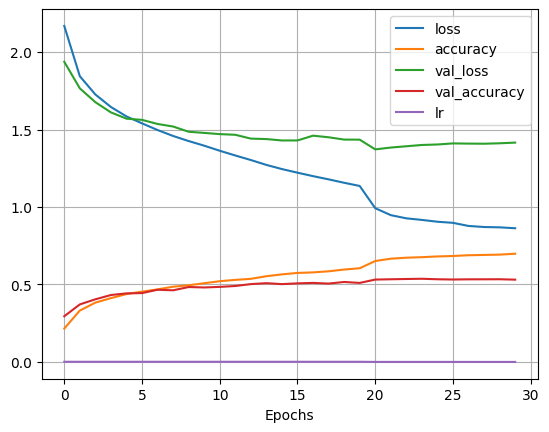

In [40]:
pd.DataFrame(history_bn.history).plot(grid=True, xlabel="Epochs")

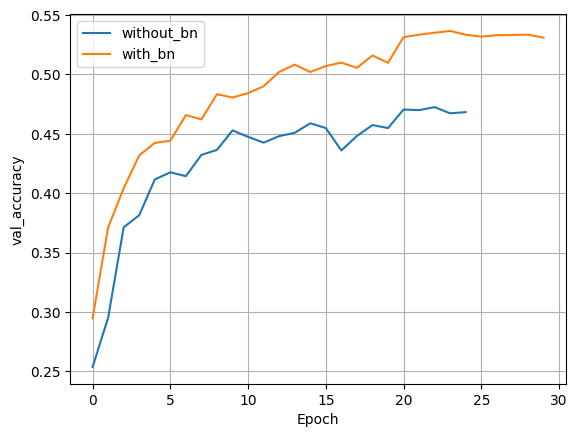

In [68]:
pd.DataFrame(
    data={
        'without_bn': pd.Series(history.history['val_accuracy']),
        'with_bn': pd.Series(history_bn.history['val_accuracy']),
        }
).plot(grid=True, xlabel='Epoch', ylabel='val_accuracy');

4. Try replacing batch normalization with SELU, and make the necessary adjustments to ensure the network self-normalizes (i.e., standardize the input features, use LeCun normal initialization, make sure the DNN contains only a sequence of dense layers, etc.).

In [48]:
norm_layer = tf.keras.layers.Normalization(axis=(1, 2, 3))
model_selu = tf.keras.Sequential()
model_selu.add(norm_layer)
model_selu.add(tf.keras.layers.Flatten(input_shape=[32, 32, 3]))
for _ in range(20):
    model_selu.add(tf.keras.layers.Dense(100, activation="selu", kernel_initializer="lecun_normal"))
model_selu.add(tf.keras.layers.Dense(10, activation="softmax"))

In [5]:
from pathlib import Path
from time import strftime

def get_run_logdir(root_logdir="my_logs/exercises/"):
    return Path(root_logdir) / "chapter_11" / "exercise_8" / strftime("run_%Y_%m_%d_%H_%M_%S")

run_logdir = get_run_logdir()
run_logdir

PosixPath('my_logs/exercises/chapter_11/exercise_8/run_2024_04_12_09_39_03')

In [52]:
batch_size = 64
optimizer_selu = tf.keras.optimizers.legacy.Nadam()

model_selu.compile(optimizer=optimizer_selu, loss="sparse_categorical_crossentropy", metrics=["accuracy"])

early_stopping_cb_selu = tf.keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)
learning_rate_cb_selu = tf.keras.callbacks.ReduceLROnPlateau(patience=5, verbose=1)
tb_callback_selu = tf.keras.callbacks.TensorBoard(get_run_logdir())

norm_layer.adapt(X_train, batch_size=batch_size)

history_selu = model_selu.fit(X_train, y_train,
                              validation_data=(X_valid, y_valid), 
                              epochs=30, 
                              callbacks=[early_stopping_cb_bn, learning_rate_cb_bn, tb_callback_selu],
                              batch_size=batch_size)

Epoch 1/30
625/625 [==============================] - 31s 44ms/step - loss: 1.9357 - accuracy: 0.3108 - val_loss: 1.7947 - val_accuracy: 0.3628 - lr: 0.0010
Epoch 2/30
625/625 [==============================] - 26s 42ms/step - loss: 1.7089 - accuracy: 0.3916 - val_loss: 1.6984 - val_accuracy: 0.3972 - lr: 0.0010
Epoch 3/30
625/625 [==============================] - 27s 43ms/step - loss: 1.6115 - accuracy: 0.4287 - val_loss: 1.6304 - val_accuracy: 0.4275 - lr: 0.0010
Epoch 4/30
625/625 [==============================] - 26s 41ms/step - loss: 1.5504 - accuracy: 0.4582 - val_loss: 1.5968 - val_accuracy: 0.4387 - lr: 0.0010
Epoch 5/30
625/625 [==============================] - 26s 41ms/step - loss: 1.4931 - accuracy: 0.4762 - val_loss: 1.5572 - val_accuracy: 0.4609 - lr: 0.0010
Epoch 6/30
625/625 [==============================] - 27s 42ms/step - loss: 1.4481 - accuracy: 0.4931 - val_loss: 1.5514 - val_accuracy: 0.4611 - lr: 0.0010
Epoch 7/30
625/625 [==============================] - 26s 

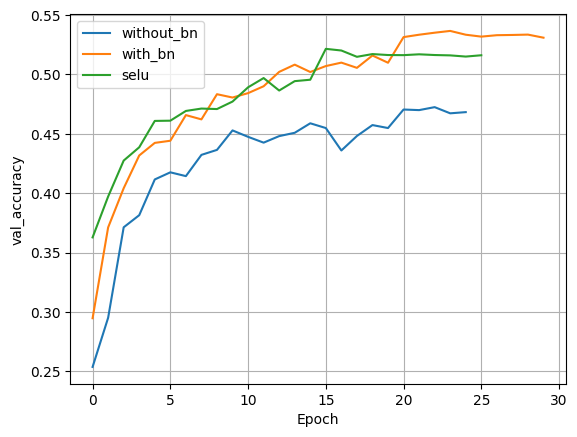

In [69]:
pd.DataFrame(
    data={
        'without_bn': pd.Series(history.history['val_accuracy']),
        'with_bn': pd.Series(history_bn.history['val_accuracy']),
        'selu': pd.Series(history_selu.history['val_accuracy'])
        }
).plot(grid=True, xlabel='Epoch', ylabel='val_accuracy');

It seems the validation accuracy using SELU increases even faster than with Batch Normalization, although it settles a little lower.

In [63]:
X_train.mean(axis=0).shape

(32, 32, 3)

In [67]:
norm_layer.mean.shape

TensorShape([1, 32, 32, 3])

5. Try regularizing the model with alpha dropout. Then, without retraining your model, see if you can achieve better accuracy using MC dropout.

In [6]:
dropout_rate = 0.1
tf.keras.utils.set_random_seed(42)

norm_layer_alpha_dropout = tf.keras.layers.Normalization(axis=(1, 2, 3))

model_alpha_dropout = tf.keras.Sequential()
model_alpha_dropout.add(norm_layer_alpha_dropout)
model_alpha_dropout.add(tf.keras.layers.Flatten(input_shape=[32, 32, 3]))
for _ in range(20):
    model_alpha_dropout.add(tf.keras.layers.Dense(100, activation="selu", kernel_initializer="lecun_normal"))
model_alpha_dropout.add(tf.keras.layers.AlphaDropout(rate=dropout_rate))
model_alpha_dropout.add(tf.keras.layers.Dense(10, activation="softmax"))

2024-04-12 09:40:45.607301: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M2 Max
2024-04-12 09:40:45.607319: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 32.00 GB
2024-04-12 09:40:45.607325: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 10.67 GB
2024-04-12 09:40:45.607356: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-04-12 09:40:45.607371: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [7]:
batch_size = 64
optimizer_alpha_dropout = tf.keras.optimizers.legacy.Nadam()

model_alpha_dropout.compile(optimizer=optimizer_alpha_dropout, loss="sparse_categorical_crossentropy", metrics=["accuracy"])

early_stopping_cb_alpha_dropout = tf.keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)
learning_rate_cb_alpha_dropout = tf.keras.callbacks.ReduceLROnPlateau(patience=5, verbose=1)
tb_callback_alpha_dropout = tf.keras.callbacks.TensorBoard(get_run_logdir())

norm_layer_alpha_dropout.adapt(X_train, batch_size=batch_size)

history_alpha_dropout = model_alpha_dropout.fit(X_train, y_train,
                              validation_data=(X_valid, y_valid), 
                              epochs=50, 
                              callbacks=[early_stopping_cb_alpha_dropout, learning_rate_cb_alpha_dropout, tb_callback_alpha_dropout],
                              batch_size=batch_size)

2024-04-12 09:41:49.961662: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


Epoch 1/50
625/625 [==============================] - 29s 43ms/step - loss: 1.9281 - accuracy: 0.3140 - val_loss: 1.7631 - val_accuracy: 0.3720 - lr: 0.0010
Epoch 2/50
625/625 [==============================] - 26s 42ms/step - loss: 1.6918 - accuracy: 0.4013 - val_loss: 1.7091 - val_accuracy: 0.4000 - lr: 0.0010
Epoch 3/50
625/625 [==============================] - 26s 42ms/step - loss: 1.6039 - accuracy: 0.4350 - val_loss: 1.6505 - val_accuracy: 0.4373 - lr: 0.0010
Epoch 4/50
625/625 [==============================] - 26s 42ms/step - loss: 1.5370 - accuracy: 0.4626 - val_loss: 1.5787 - val_accuracy: 0.4546 - lr: 0.0010
Epoch 5/50
625/625 [==============================] - 26s 42ms/step - loss: 1.4862 - accuracy: 0.4769 - val_loss: 1.6094 - val_accuracy: 0.4570 - lr: 0.0010
Epoch 6/50
625/625 [==============================] - 26s 42ms/step - loss: 1.4407 - accuracy: 0.4980 - val_loss: 1.5474 - val_accuracy: 0.4763 - lr: 0.0010
Epoch 7/50
625/625 [==============================] - 26s 

In [8]:
model_alpha_dropout.evaluate(X_train, y_train, batch_size=batch_size)

625/625 [==============================] - 8s 13ms/step - loss: 0.9936 - accuracy: 0.6545


[0.9935826063156128, 0.6545000076293945]

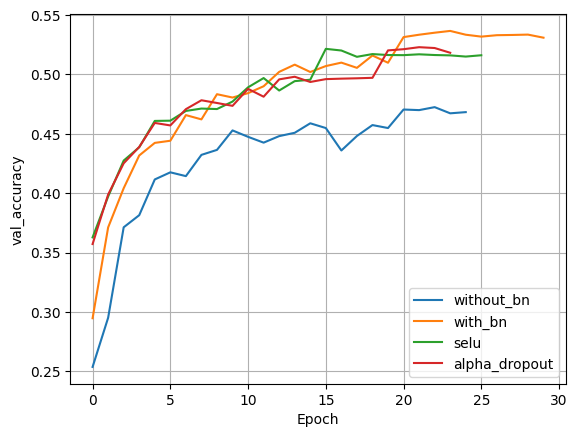

In [98]:
pd.DataFrame(
    data={
        'without_bn': pd.Series(history.history['val_accuracy']),
        'with_bn': pd.Series(history_bn.history['val_accuracy']),
        'selu': pd.Series(history_selu.history['val_accuracy']),
        'alpha_dropout': pd.Series(history_alpha_dropout.history['val_accuracy'])
        }
).plot(grid=True, xlabel='Epoch', ylabel='val_accuracy');

The model with AlphaDropout layer reached close to BN model's performance, but did not outperform it.

Now let's use MC dropout:

In [10]:
# To have a baseline
model_alpha_dropout.evaluate(X_test, y_test)

313/313 [==============================] - 5s 15ms/step - loss: 1.5167 - accuracy: 0.5200


[1.5167427062988281, 0.5199999809265137]

In [50]:
tf.keras.utils.set_random_seed(42)

In [51]:
class MCAlphaDropout(tf.keras.layers.AlphaDropout):
    def call(self, inputs, training=False):
        return super().call(inputs, training=True)

In [93]:
dropout_rate = 0.1
tf.keras.utils.set_random_seed(42)

norm_layer_mc_alpha_dropout = tf.keras.layers.Normalization(axis=(1, 2, 3))
norm_layer_mc_alpha_dropout.adapt(X_train, batch_size=batch_size)

model_mc_alpha_dropout = tf.keras.Sequential()
model_mc_alpha_dropout.add(norm_layer_mc_alpha_dropout)
model_mc_alpha_dropout.add(tf.keras.layers.Flatten(input_shape=[32, 32, 3]))
for _ in range(20):
    model_mc_alpha_dropout.add(tf.keras.layers.Dense(100, activation="selu", kernel_initializer="lecun_normal"))
model_mc_alpha_dropout.add(MCAlphaDropout(rate=dropout_rate, seed=42))
model_mc_alpha_dropout.add(tf.keras.layers.Dense(10, activation="softmax"))

In [94]:
model_mc_alpha_dropout.build(input_shape=(32, 32, 3))

In [95]:
model_mc_alpha_dropout.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_4 (Normaliza  (None, 32, 32, 3)         6145      
 tion)                                                           
                                                                 
 flatten_4 (Flatten)         (None, 3072)              0         
                                                                 
 dense_85 (Dense)            (None, 100)               307300    
                                                                 
 dense_86 (Dense)            (None, 100)               10100     
                                                                 
 dense_87 (Dense)            (None, 100)               10100     
                                                                 
 dense_88 (Dense)            (None, 100)               10100     
                                                      

In [96]:
model_mc_alpha_dropout.set_weights(model_alpha_dropout.get_weights())

In [97]:
model_mc_alpha_dropout.predict(X_train[:1])

1/1 [==============================] - 0s 140ms/step


array([[3.7088031e-03, 4.3499775e-04, 5.9130337e-02, 3.3822622e-02,
        3.7878945e-02, 1.0924663e-02, 8.5229665e-01, 1.2083704e-03,
        4.4607700e-04, 1.4852454e-04]], dtype=float32)

In [98]:
model_mc_alpha_dropout.predict(X_train[:1])

1/1 [==============================] - 0s 41ms/step


array([[3.6970866e-03, 4.1837900e-04, 6.4566083e-02, 3.2487638e-02,
        3.9726812e-02, 1.1797851e-02, 8.4551823e-01, 1.1933437e-03,
        4.4041540e-04, 1.5413933e-04]], dtype=float32)

In [99]:
y_probas = np.stack([model_mc_alpha_dropout(X_test) for sample in range(100)])
y_proba = y_probas.mean(axis=0)

y_pred = y_proba.argmax(axis=1).reshape(-1, 1)
accuracy = (y_pred == y_test).sum() / len(y_test)
accuracy

0.5206

Barely improved!

6. Retrain your model using 1cycle scheduling and see if it improves training speed and model accuracy.

1cycle scheduling starts by increasing the initial learning rate η0, growing linearly up to η1 halfway through training. Then it decreases the learning rate linearly down to η0 again during the second half of training, finishing the last few epochs by dropping the rate down by several orders of magnitude (still linearly). The maximum learning rate η1 is chosen using the same approach we used to find the optimal learning rate, and the initial learning rate η0 is usually 10 times lower.

Let's start by finding η0 and η1. We have done this in Exercise 10 of Chapter 10:

In [105]:
def scheduler(epoch, lr):
    max = 10
    min = 1e-5
    n_epochs = 30
    factor = (max / min) ** (1 / n_epochs)
    return lr * factor

In [114]:
tf.keras.utils.set_random_seed(42)

norm_layer_1cycle = tf.keras.layers.Normalization(axis=(1, 2, 3))

model_1cycle = tf.keras.Sequential()
model_1cycle.add(norm_layer_1cycle)
model_1cycle.add(tf.keras.layers.Flatten(input_shape=[32, 32, 3]))
for _ in range(20):
    model_1cycle.add(tf.keras.layers.Dense(100, activation="selu", kernel_initializer="lecun_normal"))
model_1cycle.add(tf.keras.layers.AlphaDropout(rate=0.1))
model_1cycle.add(tf.keras.layers.Dense(10, activation="softmax"))

batch_size = 128
optimizer_1cycle = tf.keras.optimizers.legacy.Nadam(learning_rate=1e-5)

model_1cycle.compile(optimizer=optimizer_1cycle, loss="sparse_categorical_crossentropy", metrics=["accuracy"])

learning_rate_cb_1cycle = tf.keras.callbacks.LearningRateScheduler(scheduler, verbose=1)
tb_callback_1cycle = tf.keras.callbacks.TensorBoard(get_run_logdir())

norm_layer_1cycle.adapt(X_train, batch_size=batch_size)

history_1cycle = model_1cycle.fit(X_train, y_train,
                              validation_data=(X_valid, y_valid), 
                              epochs=30, 
                              callbacks=[learning_rate_cb_1cycle, tb_callback_1cycle],
                              batch_size=batch_size)



Epoch 1: LearningRateScheduler setting learning rate to 1.5848931524233436e-05.
Epoch 1/30
313/313 [==============================] - 20s 54ms/step - loss: 2.3451 - accuracy: 0.2033 - val_loss: 1.9917 - val_accuracy: 0.2982 - lr: 1.5849e-05

Epoch 2: LearningRateScheduler setting learning rate to 2.5118862961658603e-05.
Epoch 2/30
313/313 [==============================] - 15s 49ms/step - loss: 2.0416 - accuracy: 0.2899 - val_loss: 1.8678 - val_accuracy: 0.3510 - lr: 2.5119e-05

Epoch 3: LearningRateScheduler setting learning rate to 3.9810715050325415e-05.
Epoch 3/30
313/313 [==============================] - 15s 49ms/step - loss: 1.8925 - accuracy: 0.3384 - val_loss: 1.7736 - val_accuracy: 0.3814 - lr: 3.9811e-05

Epoch 4: LearningRateScheduler setting learning rate to 6.309573111472314e-05.
Epoch 4/30
313/313 [==============================] - 15s 49ms/step - loss: 1.7733 - accuracy: 0.3766 - val_loss: 1.7024 - val_accuracy: 0.4046 - lr: 6.3096e-05

Epoch 5: LearningRateScheduler s

In [115]:
history_1cycle.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy', 'lr'])

<Axes: >

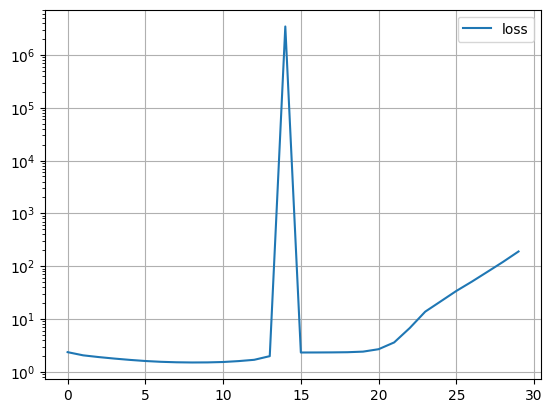

In [117]:
df = pd.DataFrame(history_1cycle.history)
df[['loss']].plot(grid=True, logy=True)

The diagram does not help much but from the logs we see that from epoch 10 afterwards the loss starts to shoot back up.

So, let's use the learning rate at epoch 10 as  `η1` (= 0.001) and let `η0 = η1 / 10 = 0.0001`.

In [118]:
def scheduler_1cycle(epoch, lr):
    n_epochs = 30
    half_epochs = n_epochs / 2
    max = 0.001
    min = 0.0001
    factor = (max / min) ** (1 / half_epochs)
    if epoch <= half_epochs:
        new_lr = lr * factor
    elif epoch > half_epochs and epoch < 25:
        new_lr = lr / factor
    else:
        # drop linearly several orders of magnitute at the very last epochs
        new_lr = lr / 10
    return new_lr

In [119]:
tf.keras.utils.set_random_seed(42)

norm_layer_1cycle = tf.keras.layers.Normalization(axis=(1, 2, 3))

model_1cycle = tf.keras.Sequential()
model_1cycle.add(norm_layer_1cycle)
model_1cycle.add(tf.keras.layers.Flatten(input_shape=[32, 32, 3]))
for _ in range(20):
    model_1cycle.add(tf.keras.layers.Dense(100, activation="selu", kernel_initializer="lecun_normal"))
model_1cycle.add(tf.keras.layers.AlphaDropout(rate=0.1))
model_1cycle.add(tf.keras.layers.Dense(10, activation="softmax"))

batch_size = 64
optimizer_1cycle = tf.keras.optimizers.legacy.Nadam(learning_rate=0.0001)

model_1cycle.compile(optimizer=optimizer_1cycle, loss="sparse_categorical_crossentropy", metrics=["accuracy"])

learning_rate_cb_1cycle = tf.keras.callbacks.LearningRateScheduler(scheduler_1cycle, verbose=1)
tb_callback_1cycle = tf.keras.callbacks.TensorBoard(get_run_logdir())

norm_layer_1cycle.adapt(X_train, batch_size=batch_size)

history_1cycle = model_1cycle.fit(X_train, y_train,
                              validation_data=(X_valid, y_valid), 
                              epochs=30, 
                              callbacks=[learning_rate_cb_1cycle, tb_callback_1cycle],
                              batch_size=batch_size)


Epoch 1: LearningRateScheduler setting learning rate to 0.00011659143717263565.
Epoch 1/30
625/625 [==============================] - 34s 49ms/step - loss: 1.9810 - accuracy: 0.3086 - val_loss: 1.7247 - val_accuracy: 0.3983 - lr: 1.1659e-04

Epoch 2: LearningRateScheduler setting learning rate to 0.00013593563473083387.
Epoch 2/30
625/625 [==============================] - 29s 47ms/step - loss: 1.6946 - accuracy: 0.4038 - val_loss: 1.6510 - val_accuracy: 0.4208 - lr: 1.3594e-04

Epoch 3: LearningRateScheduler setting learning rate to 0.0001584893194515565.
Epoch 3/30
625/625 [==============================] - 29s 47ms/step - loss: 1.5729 - accuracy: 0.4399 - val_loss: 1.5779 - val_accuracy: 0.4495 - lr: 1.5849e-04

Epoch 4: LearningRateScheduler setting learning rate to 0.00018478497826891695.
Epoch 4/30
625/625 [==============================] - 29s 47ms/step - loss: 1.4939 - accuracy: 0.4701 - val_loss: 1.5635 - val_accuracy: 0.4596 - lr: 1.8478e-04

Epoch 5: LearningRateScheduler s

<Axes: xlabel='Epoch', ylabel='lr'>

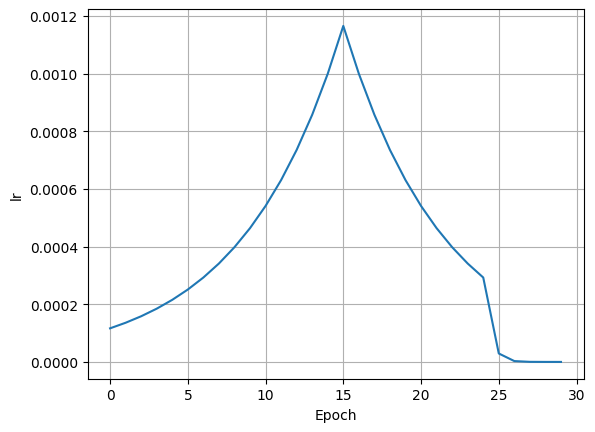

In [125]:
pd.Series(history_1cycle.history['lr']).plot(grid=True, xlabel='Epoch', ylabel='lr')

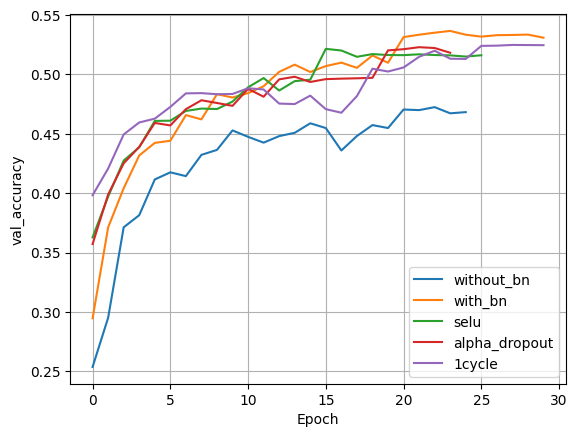

In [120]:
pd.DataFrame(
    data={
        'without_bn': pd.Series(history.history['val_accuracy']),
        'with_bn': pd.Series(history_bn.history['val_accuracy']),
        'selu': pd.Series(history_selu.history['val_accuracy']),
        'alpha_dropout': pd.Series(history_alpha_dropout.history['val_accuracy']),
        '1cycle': pd.Series(history_1cycle.history['val_accuracy'])
        }
).plot(grid=True, xlabel='Epoch', ylabel='val_accuracy');

In [121]:
model_1cycle.evaluate(X_test, y_test)

313/313 [==============================] - 5s 16ms/step - loss: 1.9376 - accuracy: 0.5226


[1.937584400177002, 0.522599995136261]

The model with 1cycle scheduling rearched over 80% accuracy on the training set. On the validation set, it was outperformed only by the BN model.